In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

Considerações Iniciais:
Usar o K-Means para separar os herois em 3 categorias (ou clusters) diferentes em NLP e Numérico

In [2]:
data = pd.read_csv('superheroes_nlp_dataset.csv')

**Prévia do Dataset**

In [3]:
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.columns

Index(['name', 'real_name', 'full_name', 'overall_score', 'history_text',
       'powers_text', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score', 'superpowers',
       'alter_egos', 'aliases', 'place_of_birth', 'first_appearance',
       'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives',
       'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color',
       'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'ha

**Inicialmente trabalharemos apenas com 6 colunas das 81 disponíveis**

Análise numérica de scores

In [5]:
short_data = data[["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]]

In [6]:
short_data.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


**Utilizando modelo PCA**

In [7]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(short_data)

#Components PCA
print(pca.components_)

[[-0.25691853 -0.47127043 -0.40727426 -0.46938034 -0.46053678 -0.33706483]
 [-0.52817051  0.53325932  0.10120459  0.18595451 -0.07523418 -0.62144089]
 [-0.07582368 -0.31782594 -0.19693964 -0.0469491   0.85116253 -0.35744979]
 [-0.22728389 -0.36747115  0.86957063 -0.23327954  0.0092559  -0.05146743]
 [ 0.76341395 -0.01153324  0.16820184  0.02881189 -0.14969512 -0.60459532]
 [ 0.12174038  0.50730395  0.02559589 -0.82924624  0.18781304  0.06514419]]


Variância

In [8]:
print(pca.explained_variance_)

[3696.86344297  802.74340885  417.59671864  275.65687564  239.77091469
  208.2655717 ]


**K-MEANS**

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
print("a")

a


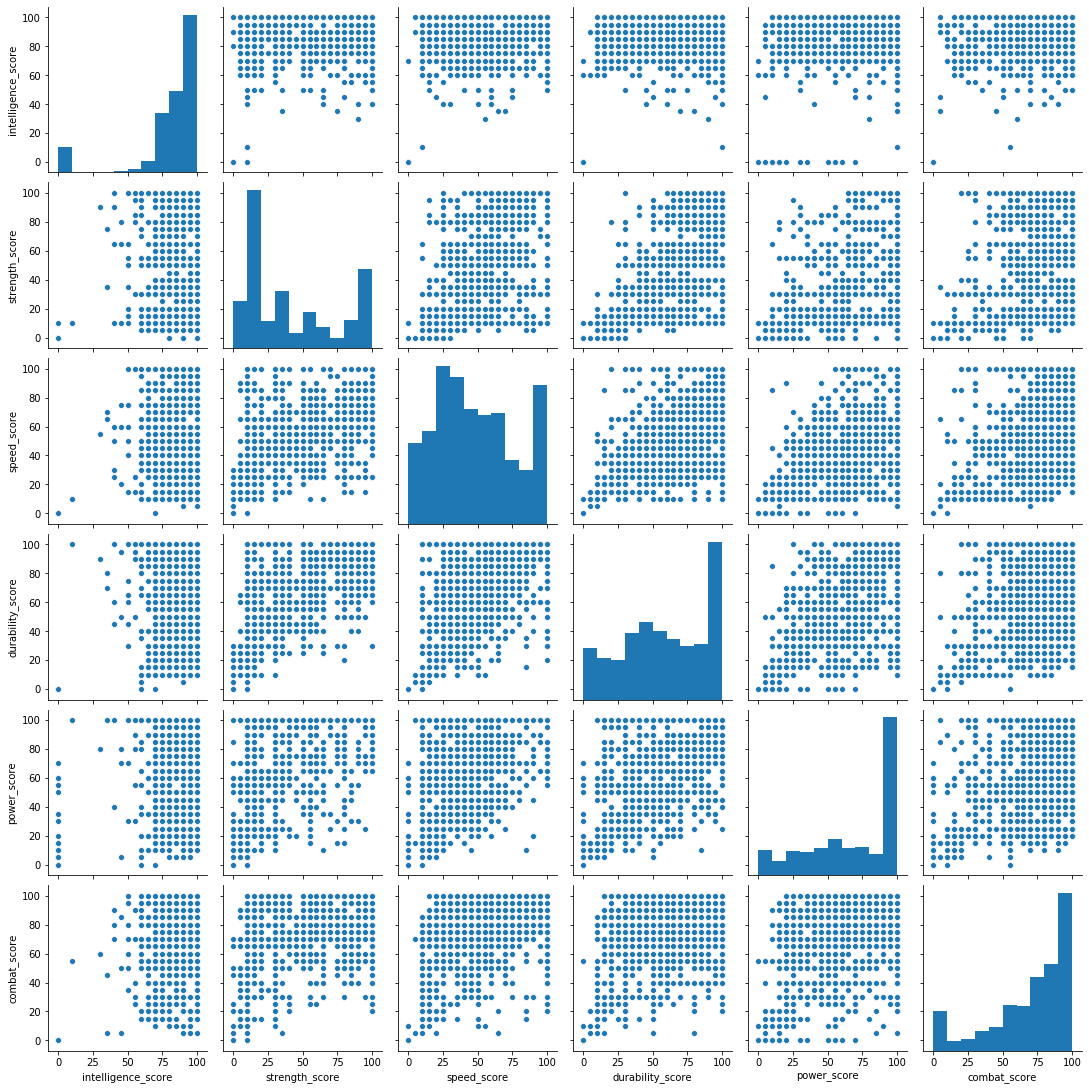

In [10]:
sb.pairplot(short_data)
plt.show()

In [11]:
X = np.array(short_data)

In [12]:
X

array([[ 85,  30,  60,  60,  40,  70],
       [100,  20,  30,  50,  35, 100],
       [ 80, 100,  80, 100, 100,  80],
       ...,
       [ 95,  50, 100,  75, 100,  80],
       [ 75,  10, 100,  30, 100,  30],
       [ 45,  80,  75,  95,  80,  50]], dtype=int64)

In [13]:
np.set_printoptions(threshold=sys.maxsize)

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [16]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [17]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1,

In [18]:
short_data["k-classes"] = kmeans.labels_
short_data["name"] = data["name"]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
short_data.head(20)

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,k-classes,name
0,85,30,60,60,40,70,1,3-D Man
1,100,20,30,50,35,100,1,514A (Gotham)
2,80,100,80,100,100,80,0,A-Bomb
3,80,50,55,45,100,55,1,Aa
4,80,10,25,40,30,50,1,Aaron Cash
5,90,40,45,55,55,85,1,Aayla Secura
6,95,30,35,65,100,85,1,Abe Sapien
7,75,90,55,65,100,65,0,Abin Sur
8,85,100,80,90,100,95,0,Abomination
9,100,10,20,30,100,55,1,Abra Kadabra (CW)


Hmk

**Aplicação com NLP**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [21]:
text_data = data[["name","real_name","full_name","history_text","powers_text"]]
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [22]:
text_data.head()

,name,real_name,full_name,history_text,powers_text
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.","Delroy Garrett, Jr. grew up to become a track ...",NaN
1,514A (Gotham),Bruce Wayne,NaN,He was one of the many prisoners of Indian Hil...,NaN
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu..."
3,Aa,Aa,NaN,Aa is one of the more passive members of the P...,NaN
4,Aaron Cash,Aaron Cash,Aaron Cash,Aaron Cash is the head of security at Arkham A...,NaN


**Seleção de Stopwords, Remoção de Missing Data e Aplicação de Lowercase**

In [23]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
text_data = text_data.fillna('').astype(str).apply(lambda x: x.str.lower())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Preview de Dataset**

In [24]:
text_data.head(10)

,name,real_name,full_name,history_text,powers_text
0,3-d man,"delroy garrett, jr.","delroy garrett, jr.","delroy garrett, jr. grew up to become a track ...",
1,514a (gotham),bruce wayne,,he was one of the many prisoners of indian hil...,
2,a-bomb,richard milhouse jones,richard milhouse jones,"richard ""rick"" jones was orphaned at a young ...","on rare occasions, and through unusual circu..."
3,aa,aa,,aa is one of the more passive members of the p...,
4,aaron cash,aaron cash,aaron cash,aaron cash is the head of security at arkham a...,
5,aayla secura,aayla secura,,ayla secura was a rutian twi'lek jedi knight (...,
6,abe sapien,abraham sapien,abraham sapien,"sapien began life as langdon everett caul, a ...",abe is a humanoid amphibious creature. he has...
7,abin sur,,,originally a history professor on the planet ...,abin sur possessed an exceptionally strong s...
8,abomination,emil blonsky,emil blonsky,"formerly known as emil blonsky, a spy of sovie...",'blonsky''s transformation into the abominatio...
9,abra kadabra (cw),unknown,unknown,"""abra kadabra"" was a criminal time traveler fr...",abra kadabra was augmented with various nanot...


**Compilado das colunas de texto**

In [25]:
text_data["comp"] = text_data["name"] + " " + text_data["real_name"] + " " + text_data["full_name"] + " " + text_data["history_text"] + " " + text_data["powers_text"]

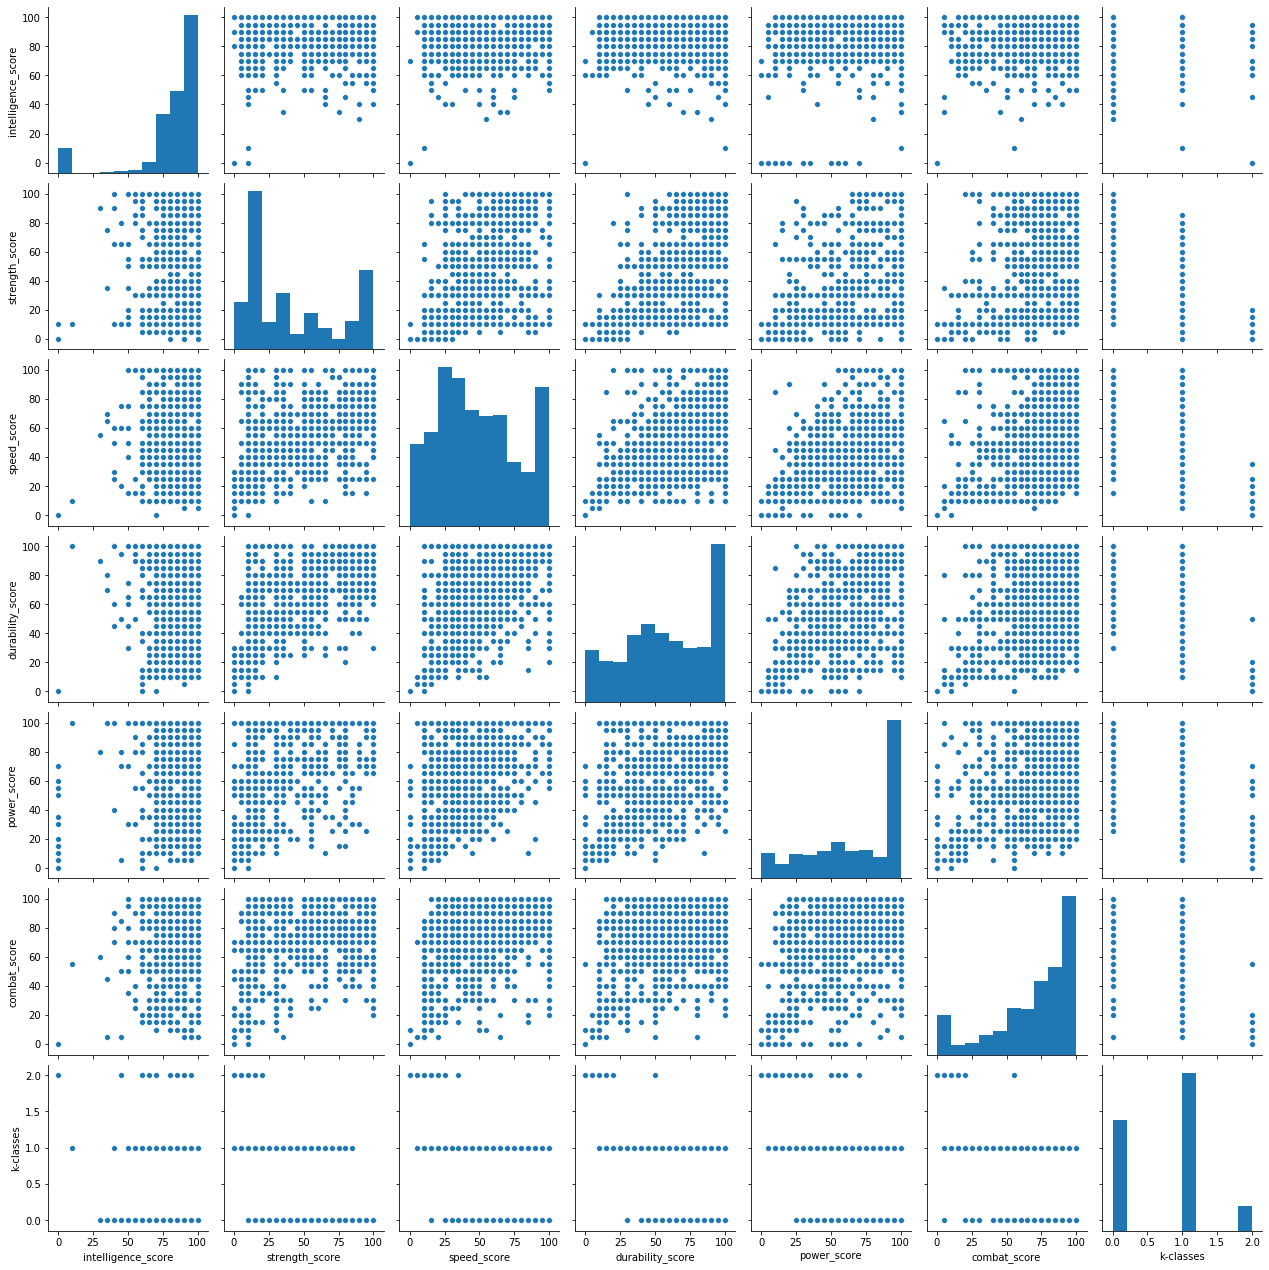

In [26]:
sb.pairplot(short_data)
plt.show()

**Vetorização e remoção de stopwords**

In [27]:
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(text_data.comp.values)
features = vec.transform(text_data.comp.values)

**Predição por K-Means**

In [28]:
predicted = kmeans.predict(X)
print(predicted)

[1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 1 0 1 1 0 0 2 1 0 0 0 2 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 2 0 0 0
 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 1 0 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1
 1 1 0 0 0 0 0 0 1 1 1 2 0 1 2 2 1 1 1 1 0 0 2 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 1 2 0 0 0 0 2 2 1 0 0
 2 1 0 1 0 1 1 1 1 1 1 1 1 1 0 2 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 2 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 2 0 2 1 2 0 1 1 0 1 1 1 1 1 1 0 2
 2 0 0 0 1 0 1 1 1 2 1 0 2 1 1 0 0 1 0 1 1 1 1 1 1 2 0 0 0 1 1 2 1 1 1 1 0
 2 2 1 0 0 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 2 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 2 1 1 0 1 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 2 0 1 0 1 0 1 0 1 1 0 0 1 2 1 1 0 0 0 0 0 0 0 2 1 0 1 0 1 1 0 1 0 0
 0 0 2 0 1 1 0 1 2 1 1 1 

In [29]:
text_data["k-classes"] = predicted

In [30]:
text_data.sample(10)

,name,real_name,full_name,history_text,powers_text,comp,k-classes
455,evil nya,nya,nya,she was turned bad by the overlord his dark magic,darkness powers,evil nya nya nya she was turned bad by the ove...,1
255,captain america (wild west),steve rogers,,captain america helped out the guardians of th...,,captain america (wild west) steve rogers capt...,1
1357,valkyrie,brunnhilde,brunnhilde,the origin of brunnhilde the valkyrie remains ...,brunnhilde the valkyrie possesses the conventi...,valkyrie brunnhilde brunnhilde the origin of b...,0
940,nathan petrelli,nathan petrelli,nathan petrelli,"nathan petrelli is an aspiring politician who,...",nathan has the ability to fly. it is currently...,nathan petrelli nathan petrelli nathan petrell...,2
1410,witchblade,sara pezzini,,sara pezzini is an nypd homicide detective who...,,witchblade sara pezzini sara pezzini is an ny...,0
226,brainiac,vril dox,vril dox,first appearing in action comics #242 (july 19...,"a vast, superior intelligence limited only by ...",brainiac vril dox vril dox first appearing in ...,0
516,ghost rider (sony),johnny blaze,,johnny blaze was a stunt motorcyclist who sold...,johnny blaze possesses the supernatural abilit...,ghost rider (sony) johnny blaze johnny blaze ...,0
1414,wolverine (emh),james howlett,"james ""logan"" howlett",,wolverine has mutant powers which has animali...,"wolverine (emh) james howlett james ""logan"" ho...",1
634,incubus (dceu),incubus,incubus,incubus was an inter-dimensional mystical bein...,incubus is an inter-dimensional mystical bein...,incubus (dceu) incubus incubus incubus was an ...,0
623,hush,thomas elliot,thomas elliot,"born a child of wealth and privilege, young th...",,hush thomas elliot thomas elliot born a child ...,1
